*   __Contexto:__


-  Este conjunto de datos, provisto por la pagina kagle.com,  proporciona un análisis, del desempeño y las características de los futbolistas en diversas ligas globales durante las temporadas 2021-2022 y 2022-2023. Incluye una variedad de datos, desde detalles básicos como la edad y la posición de juego, hasta estadísticas profesionales como goles, asistencias y lesiones.

___Introducción:___

*  La edad de los futbolistas ha sido objeto de interés y debate en el mundo del fútbol durante décadas. Más allá de ser simplemente un número, la edad puede influir significativamente en diversos aspectos del desempeño y la carrera de un jugador. 

*  A continuacion analizaremos la cantidad de goles y asistencias, evaluando el promedio por partido, y haciendo foco en la edad del jugador, discriminado por rangos de edades. 

*  Rangos
    * 'Menor a 20', 
    * '20 a 25',
    * '25 a 30', 
    * '30 a 35',
    * 'Mayor a 35'


* __Cuestiones a tratar__:

*  La cuestión fundamental que abordaremos es cómo la edad puede ser un factor determinante en el éxito y la longevidad de los futbolistas en el ámbito profesional. Exploraremos si existe una correlación entre la edad de los jugadores y su rendimiento en el campo (goles y asistencias), así  valoración en el mercado.

*    Tendremos en cuenta, tres situaciones a analizar para luego tener consideraciones finales.

*   __Desempeño en el campo__
*   __Valor y potencial__

In [1]:
# importamos las librerias clasicas a utlizar
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import matplotlib as mpl 
import seaborn as sns 

*                            Desempeño

*  Evaluar el rendimiento en términos de goles, asistencias y minutos jugados en relación con la edad del jugador.

* Aclaracion: No se tendra en cuenta a los arqueros.

In [39]:
#leo el df
df=pd.read_csv("./data.csv")

# empiezo a filtrar las columnas que voy a usar.
df_total=df[['Posicion','Apariciones','Edad','Goles','Asistencias','Valor Actual','Valor Maximo']]

# creo un filtro para que el data frame no tenga en cuenta a los arqueros.
df_total = df_total.loc[df_total['Posicion'] != 'Goalkeeper']

#paso la edad a entero
df_total['Edad'] = df_total['Edad'].astype(int)

# para que no tenga tantas sub-posiciones, me interesa, defensores, medios, y delanteros
df_total['Posicion']= df_total['Posicion'].str.extract(r'^\s*([^\s-]+)')

# Calcular la media de las apariciones (para que la medida sea lo mas representativa)
media_apariciones = df_total['Apariciones'].median()

# Filtrar el DataFrame para jugadores con igual o más apariciones que la media
df_total= df_total[df_total['Apariciones'] >= media_apariciones]


# Crea los límites para cada rango de edad
bins = [0, 20, 25, 30, 35, float('inf')]  # Infinito para capturar edades mayores a 35

# Crea las etiquetas para cada rango de edad
labels = [' Menor a 20', '20 a 25', '25 a 30', '30 a 35', 'Mayor a 35']

# Utiliza pd.cut() para asignar cada edad a un rango y crear una nueva columna 'Grupo de Edad'
df_total['Grupo de Edad'] = pd.cut(df_total['Edad'], bins=bins, labels=labels, right=False)


# un df por cada posicion

# defensores
defensores = df_total.loc[df_total['Posicion'] != 'Defender']

# mediocampistas
mediocampistas=df_total.loc[df_total['Posicion'] != 'midfield']

# delanteros
delanteros=df_total.loc[df_total['Posicion'] != 'Attack']


In [20]:
# creo una funcion que dado un df, me crea un grafico con las especificaciones dadas
def grafico_promedio_goles_asistencias(df):
    
    # Establecer el estilo de seaborn
    sns.set_style("whitegrid")

    # Crear un gráfico de barras agrupadas por 'Grupo de Edad' con el promedio de 'Goles' y 'Asistencias'
    plt.figure(figsize=(16, 12))

    # Ordenar los grupos de edad de menor a mayor
    edades = sorted(df['Grupo de Edad'].unique())

    # Obtener los datos del DataFrame
    promedio_goles = df.groupby('Grupo de Edad')['Goles'].mean().reindex(edades)
    promedio_asistencias = df.groupby('Grupo de Edad')['Asistencias'].mean().reindex(edades)

    # Establecer el ancho de las barras
    bar_width = 0.35

    # Calcular las posiciones para las barras de goles y asistencias
    bar_positions_goles = list(range(len(edades)))
    bar_positions_asistencias = [pos + bar_width for pos in bar_positions_goles]

    # Crear las barras de goles
    plt.bar(bar_positions_goles, promedio_goles, bar_width, color='skyblue', label='Promedio de Goles')

    # Crear las barras de asistencias
    plt.bar(bar_positions_asistencias, promedio_asistencias, bar_width, color='orange', label='Promedio de Asistencias')

    # Obtener el nombre del DataFrame
    nombre_df = df.name if hasattr(df, 'name') else [name for name, var in globals().items() if var is df][0]
    nombre_df=nombre_df.upper()
    
    # Personalizar el gráfico
    plt.title(f'Promedio de Goles y Asistencias por Grupo de Edad de {nombre_df}')
    plt.xlabel('Grupo de Edad')
    plt.ylabel('Promedio')
    plt.xticks([pos + bar_width / 2 for pos in bar_positions_goles], edades)  # Colocar etiquetas en el centro de las barras
    plt.legend()  # Mostrar leyenda

    # Agregar grid
    plt.grid(True, linestyle='--', alpha=0.5)  # Grid suave

    # Rotar etiquetas del eje x para una mejor visualización
    plt.xticks(rotation=45)

    
    # Mostrar el gráfico
    plt.show()
    

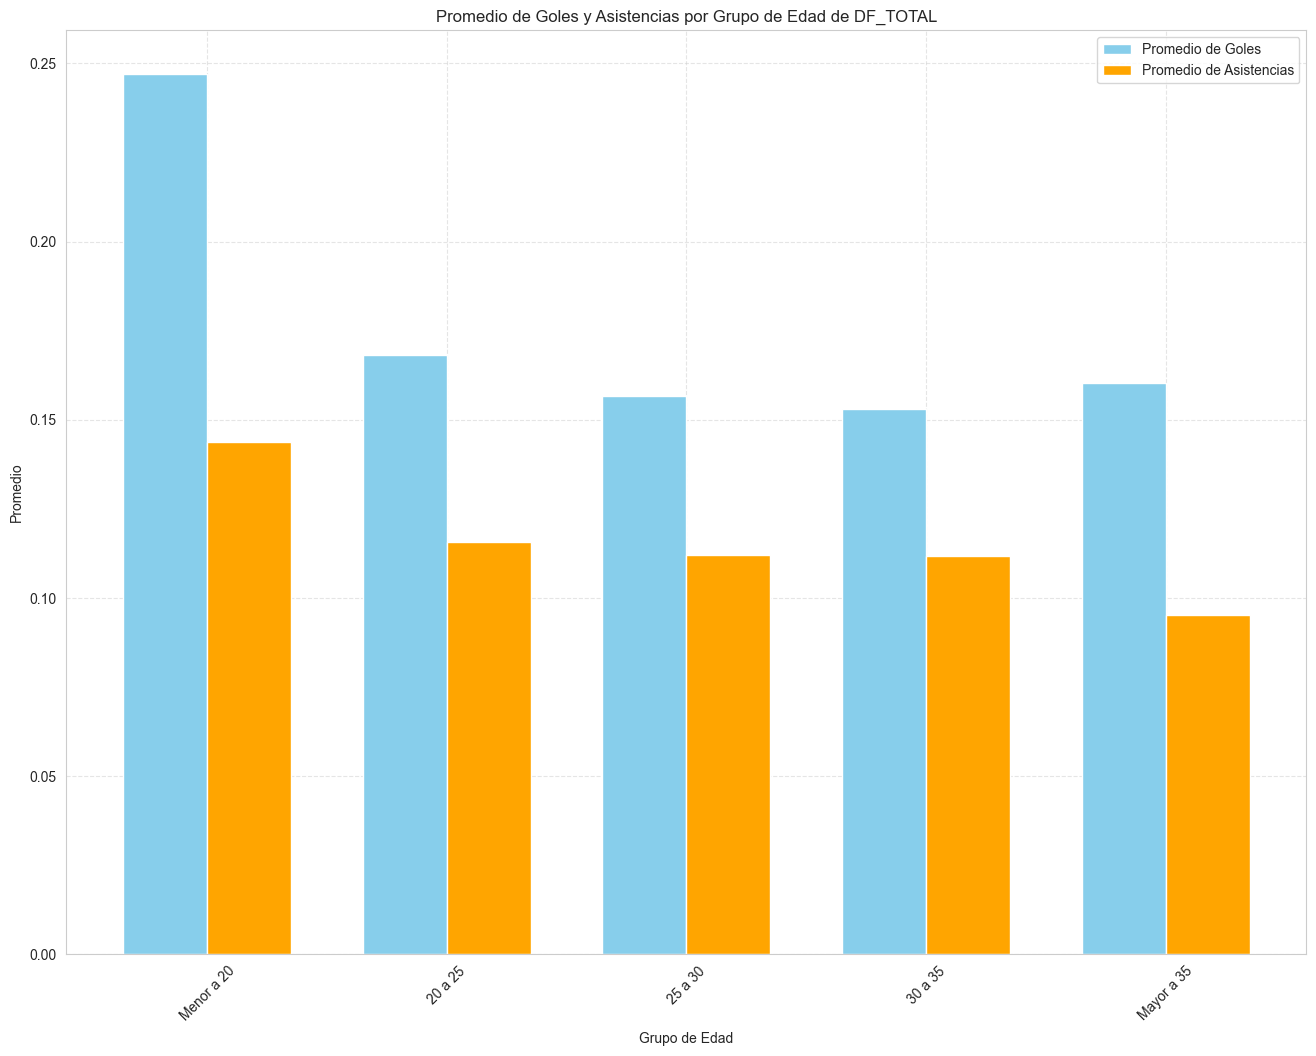

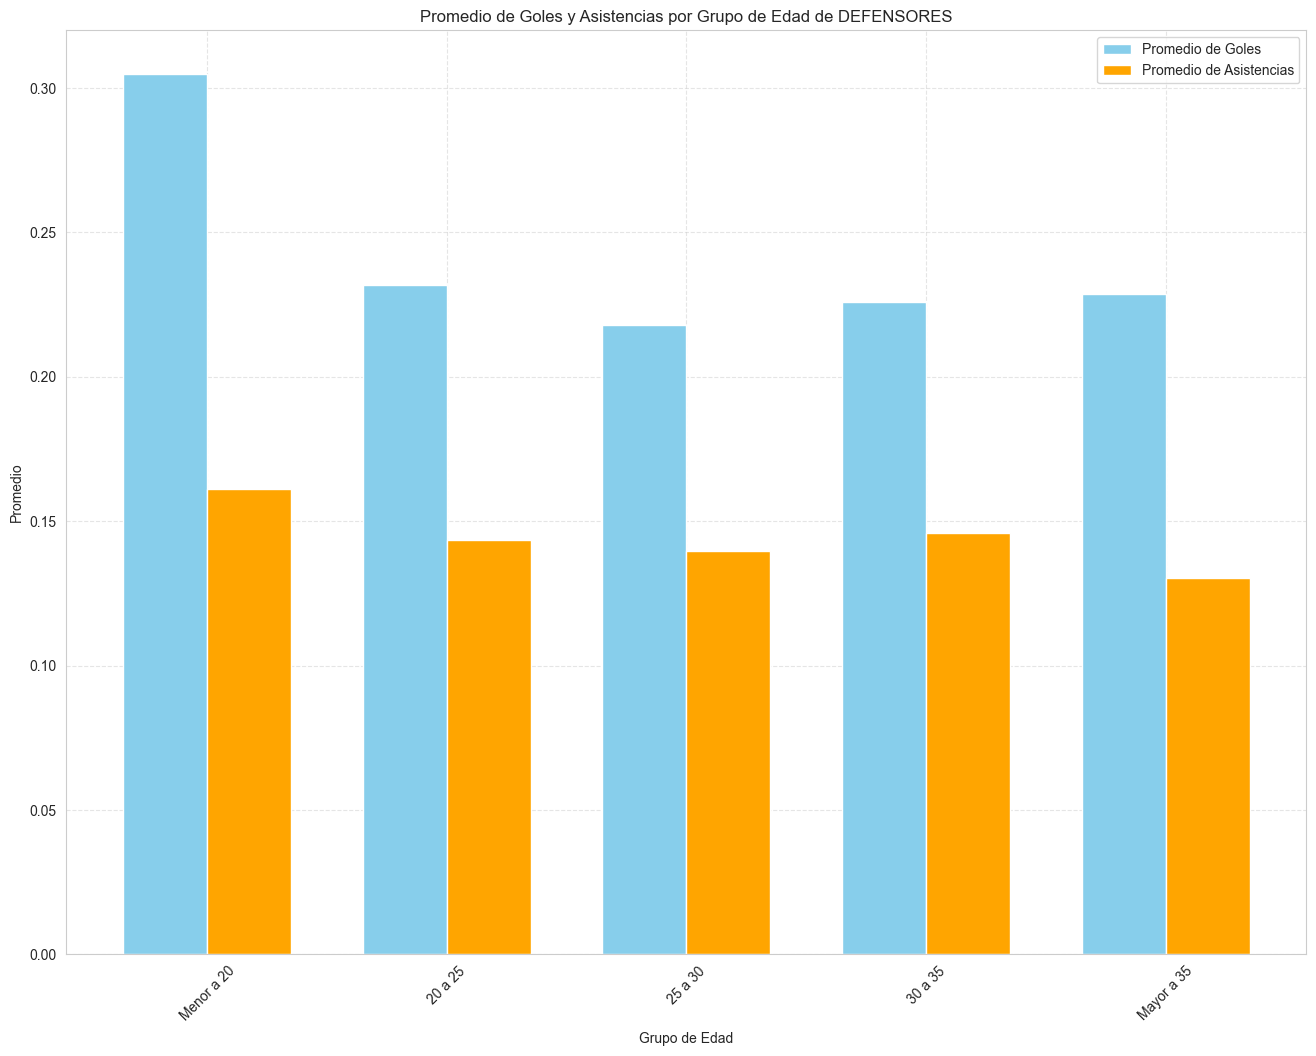

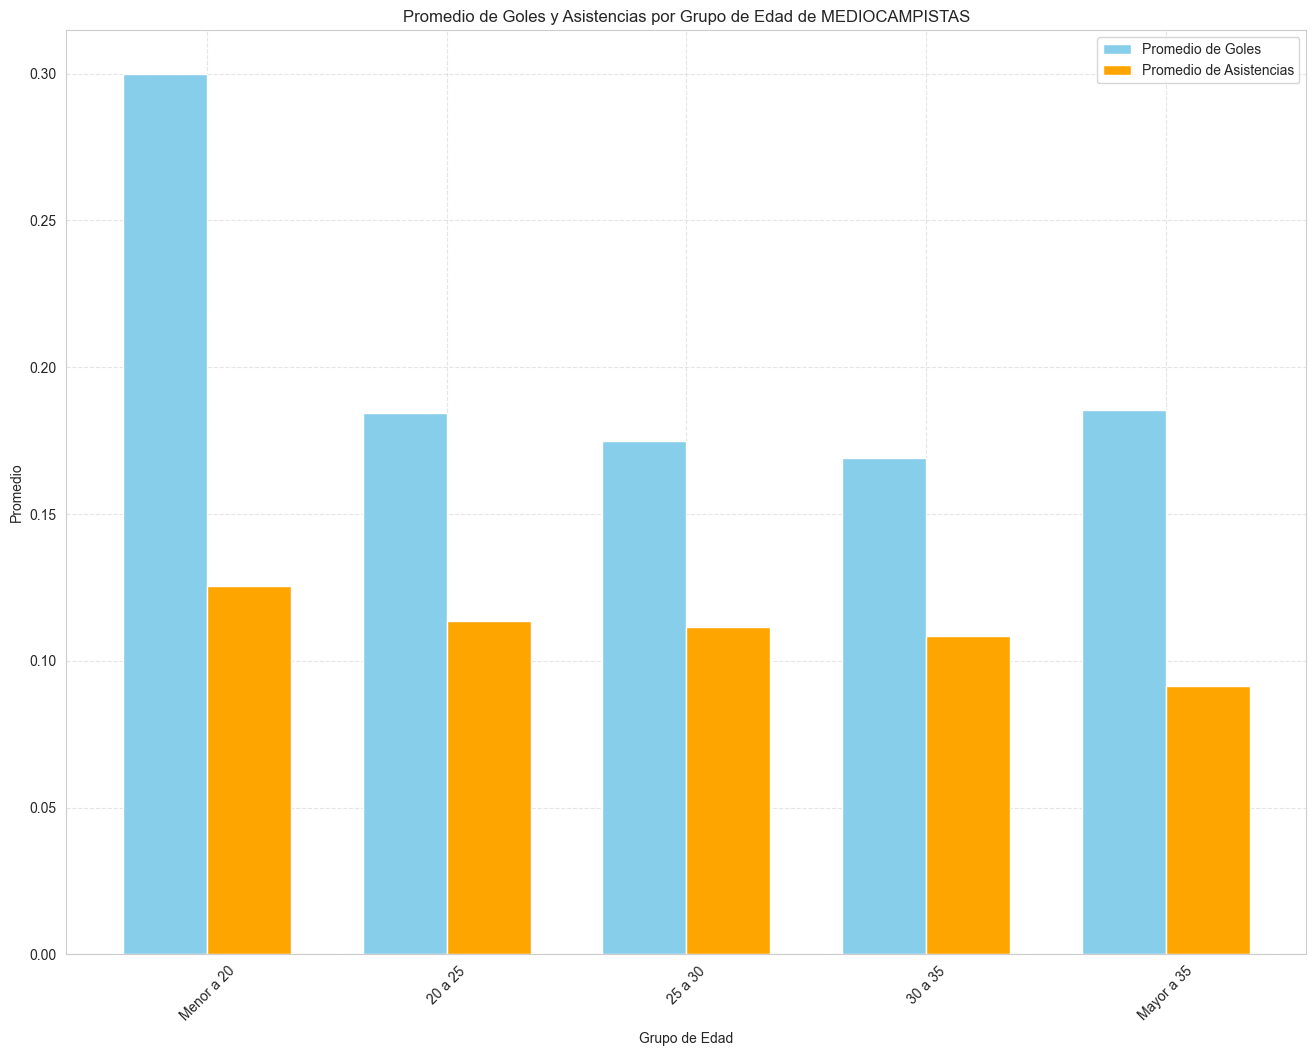

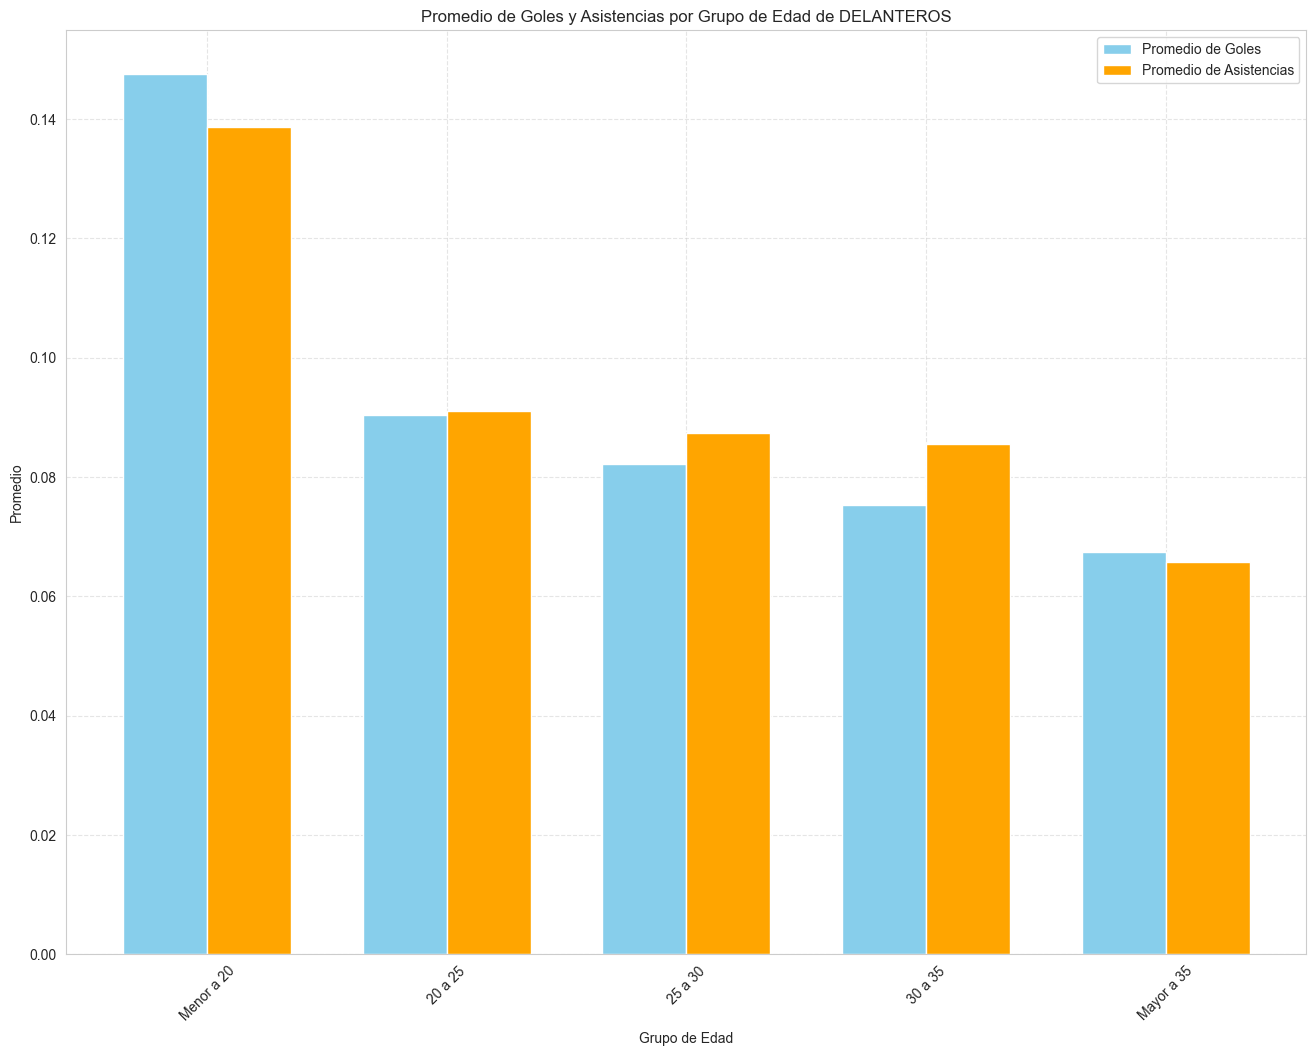

In [21]:
grafico_promedio_goles_asistencias(df_total)  
grafico_promedio_goles_asistencias(defensores) 
grafico_promedio_goles_asistencias(mediocampistas)
grafico_promedio_goles_asistencias(delanteros)    


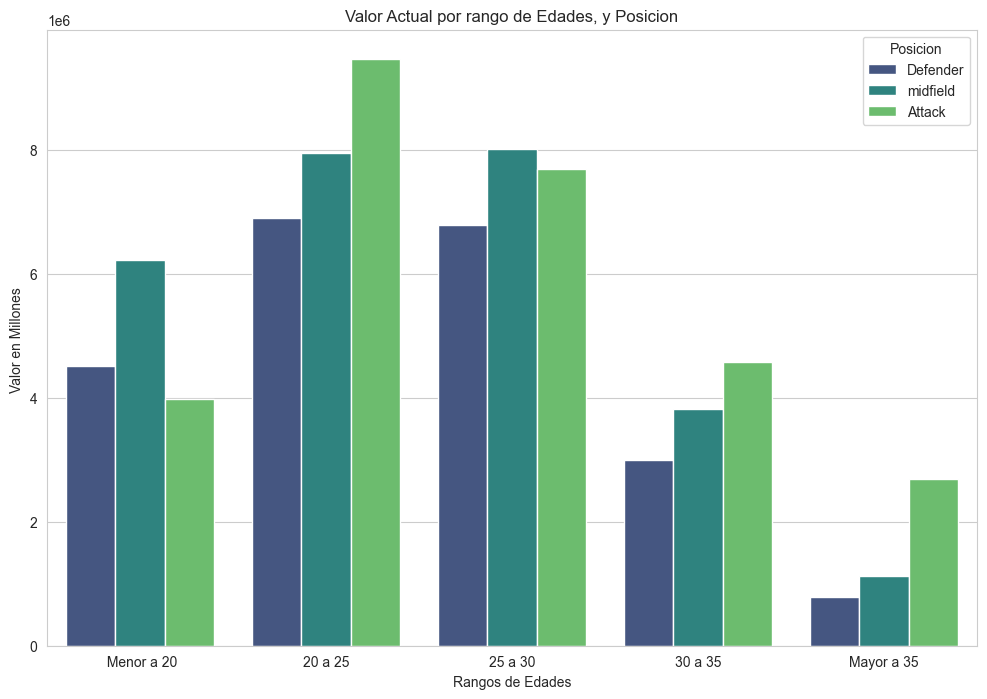

In [52]:
# Ignorar las advertencias de asignación concatenada
pd.options.mode.chained_assignment = None

df_valores=df_total[['Posicion','Valor Actual','Valor Maximo','Grupo de Edad']]
df_valores['Valor Actual']=df_valores['Valor Actual'] /1000000
df_valores['Valor Maximo']=df_valores['Valor Maximo'] /1000000


# Crear un gráfico de barras agrupadas por 'Posicion' y 'Grupo de Edad' con los valores 'Valor Actual' y 'Valor Maximo'
plt.figure(figsize=(12, 8))


sns.barplot(x='Grupo de Edad', y='Valor Actual', hue='Posicion', data=df_total, palette='viridis', errorbar=None)

# Personalizar el gráfico
plt.title('Valor Actual por rango de Edades, y Posicion')
plt.xlabel('Rangos de Edades')
plt.ylabel('Valor promedio en Millones ')
plt.legend(title='Posicion')

# Mostrar el gráfico
plt.show()